#Create a joined dataset

### Prep the listings

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import airbnblisting as airl

DB_NAME = 'airbnb'
COLL_NAME = 'listings'

In [24]:
reload(airl)

air_listing = airl.AirBnBListing(db_name=DB_NAME, coll_name=COLL_NAME)
air_listing

In [25]:
#Grab a list of listing_ids & neighborhoods for all the listings
listing_list = list(air_listing.coll.find({},{'_id':1, 'neighborhood':1}))
print len(listing_list)
listing_list[:5]

4228


[{u'_id': u'0', u'neighborhood': u'N/A'},
 {u'_id': u'6751767', u'neighborhood': u'N/A'},
 {u'_id': u'2066868', u'neighborhood': u'Western Addition/NOPA'},
 {u'_id': u'6', u'neighborhood': u'North Park'},
 {u'_id': u'4', u'neighborhood': u'N/A'}]

In [26]:
#test an example
x = listing_list[19]   # Used 20 for no damn good reason
air_listing.pull_from_db(listing_id = x['_id'])
x, air_listing.url

({u'_id': u'267820', u'neighborhood': u'Twin Peaks'},
 u'https://www.airbnb.com/rooms/267820')

In [23]:
#check the extract_features functionality
d = air_listing._extract_clean_description().split()
d

[u'the',
 u'space',
 u'cozy',
 u'clean',
 u'quiet',
 u'and',
 u'with',
 u'flair',
 u'our',
 u'apartment',
 u'is',
 u'located',
 u'in',
 u'the',
 u'twin',
 u'peaks',
 u'neighborhood',
 u'right',
 u'in',
 u'the',
 u'middle',
 u'of',
 u'the',
 u'city',
 u'of',
 u'san',
 u'francisco',
 u'situated',
 u'up',
 u'at',
 u'one',
 u'of',
 u'the',
 u'highest',
 u'elevations',
 u'in',
 u'the',
 u'city',
 u'the',
 u'breathtaking',
 u'views',
 u'of',
 u'san',
 u'francisco',
 u'and',
 u'the',
 u'bay',
 u'are',
 u'the',
 u'highlight',
 u'of',
 u'our',
 u'place',
 u'a',
 u'5',
 u'10',
 u'minute',
 u'hike',
 u'up',
 u'the',
 u'hill',
 u'will',
 u'take',
 u'you',
 u'to',
 u'one',
 u'on',
 u'the',
 u'most',
 u'visited',
 u'spots',
 u'in',
 u'san',
 u'francisco',
 u'the',
 u'top',
 u'of',
 u'twin',
 u'peaks',
 u'has',
 u'a',
 u'360',
 u'degree',
 u'view',
 u'of',
 u'the',
 u'entire',
 u'city',
 u'including',
 u'the',
 u'golden',
 u'gate',
 u'bridge',
 u'and',
 u'alcatraz',
 u'the',
 u'hill',
 u'is',
 u'a',


### Extract all descriptions

In [46]:
corpus = []
# for l in listing_list:
#     air_listing.pull_from_db(listing_id = l['_id'])
#     corpus.append(air_listing._extract_clean_description())

# cursor = air_listing.coll.find({'description_clean':{'$exists':1}},{'description_clean':1})
listing_list = list(air_listing.coll.find({'description_clean':{'$exists':1}},{'_id':1, 'description_clean':1, 'neighborhood':1}))
corpus = [l['description_clean'] for l in listing_list]

In [47]:
len(corpus)

3868

0 3868 0.0


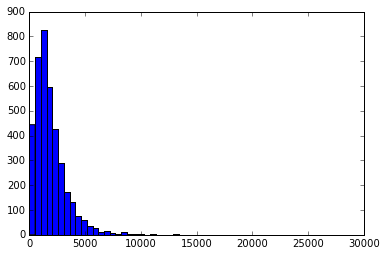

In [39]:
#EDA - how many listings are 0 length?
# lens = [len(x) for x in corpus]
# zeros = [x==0 for x in lens]
# print sum(zeros), len(corpus), round(float(sum(zeros))/len(corpus),2)
# plt.hist(lens, bins=50)
# plt.show()

{u'_id': u'6',
 u'description_clean': u'the space we are located in the heart of north park the perfect spot to stay to be minutes from every major attraction in san diego north park also has the best night life with hot new bars and restaurants within walking distance the house is also only a couple minutes drive from balboa park the zoo and the gaslamp district downtown where comic con is held during the day you can head to the beach or sea world which are a short 10 min drive away it is the perfect combination of daytime activities in san diego and nighttime activities within walking distance at night enjoy the craft beer and cocktails at urbn tiger tiger polite provisions and many more as well as delicious restaurants no shortage of night life close by if you prefer to stay in enjoy our beautiful backyard area including fire pit comfy seating and outdoor heater in case it is a little chilly the living room is comfortable and equipped with a swivel mounted tv connected to apple tv f

In [50]:
#create a word_corpus of the words in the corpus

# word_corpus = [x.encode('ascii','ignore').split() for x in corpus]
# len(word_corpus)

# # add the words to the listing
# for listing, words, doc in zip(listing_list, word_corpus, corpus):
#     listing['words'] = words
#     listing['doc'] = doc


for listing in listing_list:
    listing['words'] = listing['description_clean'].encode('ascii','ignore').split()

#Map neighborhoods to traits!

In [52]:
import airbnbneighborhood as airn

DB_NAME = 'airbnb'
COLL_NAME_NEIGHBORHOOD = 'neighborhoods'

In [53]:
reload(airn)

air_hood = airn.AirBnBNeighborhood(db_name=DB_NAME, coll_name=COLL_NAME_NEIGHBORHOOD)
air_hood

In [54]:
#Grab the hood list
hood_list = list(air_hood.coll.find({},{'_id':1, 'neighborhood':1, 'traits':1, 'city':1}))
hood_list[0]

{u'_id': 0,
 u'city': u'san-francisco',
 u'neighborhood': u'Alamo Square',
 u'traits': [u'Loved by San Franciscans', u'Stunning Views', u'Touristy']}

In [55]:
set(sum([x['traits'] for x in hood_list]))

{u'Artsy',
 u'Cultural Enclaves',
 u'Dining',
 u'Great Transit',
 u'Loved by New Yorkers',
 u'Loved by San Franciscans',
 u'Nightlife',
 u'Peace & Quiet',
 u'Shopping',
 u'Stunning Views',
 u'Touristy',
 u'Trendy'}

In [56]:
set(([x['neighborhood'] for x in hood_list]))

{u'Alamo Square',
 u'Alphabet City',
 u'Astoria',
 u'Battery Park City',
 u'Bayview',
 u'Bedford-Stuyvesant',
 u'Bernal Heights',
 u'Boerum Hill',
 u'Brooklyn Heights',
 u'Bushwick',
 u'Carroll Gardens',
 u'Chelsea',
 u'Chinatown',
 u'Civic Center',
 u'Clinton Hill',
 u'Cobble Hill',
 u'Cole Valley',
 u'Cow Hollow',
 u'Crown Heights',
 u'DUMBO',
 u'Dogpatch',
 u'Downtown',
 u'Downtown Brooklyn',
 u'Duboce Triangle',
 u'East Harlem',
 u'East Village',
 u'Excelsior',
 u'Financial District',
 u"Fisherman's Wharf",
 u'Flatbush',
 u'Flatiron District',
 u'Flushing',
 u'Fort Greene',
 u'Glen Park',
 u'Gowanus',
 u'Gramercy Park',
 u'Greenpoint',
 u'Greenwich Village',
 u'Haight-Ashbury',
 u'Harlem',
 u'Hayes Valley',
 u"Hell's Kitchen",
 u'Hudson Square',
 u'Inner Sunset',
 u'Inwood',
 u'Jackson Heights',
 u'Japantown',
 u'Kensington',
 u'Kips Bay',
 u'Lefferts Garden',
 u'Little Italy',
 u'Long Island City',
 u'Lower East Side',
 u'Lower Haight',
 u'Marina',
 u'Meatpacking District',
 u'Mid

In [71]:
#Make a dict to make it easier to map
clean_label_map = {'Artsy':'LABEL_artsy',
                 'Cultural Enclaves':'LABEL_cultural_enclave',
                 'Dining':'LABEL_dining',
                 'Great Transit':'LABEL_great_transit',
                 'Loved by New Yorkers':'LABEL_loved_by_locals',
                 'Loved by San Franciscans':'LABEL_loved_by_locals',
                 'Nightlife':'LABEL_nightlife',
                 'Peace & Quiet':'LABEL_peace_and_quiet',
                 'Shopping':'LABEL_shopping',
                 'Stunning Views':'LABEL_stunning_views',
                 'Touristy':'LABEL_touristy',
                 'Trendy':'LABEL_trendy'}

for hood in hood_list:
    hood['traits'] = map(lambda x: clean_label_map[x],hood['traits'])
    
hood_to_traits = {x['neighborhood']:x['traits'] for x in hood_list}
hood_to_city = {x['neighborhood']:x['city'] for x in hood_list}

{u'Alamo Square': ['LABEL_loved_by_locals',
  'LABEL_stunning_views',
  'LABEL_touristy'],
 u'Alphabet City': ['LABEL_nightlife',
  'LABEL_trendy',
  'LABEL_artsy',
  'LABEL_shopping',
  'LABEL_dining'],
 u'Astoria': ['LABEL_loved_by_locals'],
 u'Battery Park City': ['LABEL_peace_and_quiet'],
 u'Bayview': ['LABEL_artsy', 'LABEL_peace_and_quiet'],
 u'Bedford-Stuyvesant': ['LABEL_artsy', 'LABEL_cultural_enclave'],
 u'Bernal Heights': ['LABEL_stunning_views',
  'LABEL_peace_and_quiet',
  'LABEL_loved_by_locals',
  'LABEL_dining'],
 u'Boerum Hill': ['LABEL_peace_and_quiet',
  'LABEL_nightlife',
  'LABEL_loved_by_locals',
  'LABEL_dining',
  'LABEL_great_transit'],
 u'Brooklyn Heights': ['LABEL_peace_and_quiet',
  'LABEL_loved_by_locals',
  'LABEL_great_transit'],
 u'Bushwick': ['LABEL_artsy',
  'LABEL_cultural_enclave',
  'LABEL_dining',
  'LABEL_great_transit'],
 u'Carroll Gardens': ['LABEL_peace_and_quiet',
  'LABEL_nightlife',
  'LABEL_dining',
  'LABEL_loved_by_locals',
  'LABEL_great_

In [79]:
for listing in listing_list:
    if listing['neighborhood'] in hood_to_traits:
        listing['traits'] = hood_to_traits[listing['neighborhood']]
        listing['city'] = hood_to_city[listing['neighborhood']]

In [80]:
listing_list[10]

{u'_id': u'12522',
 'city': u'san-francisco',
 u'description_clean': u'the space we live in an 1895 victorian top flat with 12 foot ceilings on the best block in san francisco our calendar is always up to date location location location our home is close to the mission lower haight and 2 5 blocks from the castro theater the underground is 3 blocks away with a street car even closer the room is small and cosy but a great price for one of the most expensive neighborhoods in the us please fill out your profile if you are interested and make sure to arrange a time to meet prior to your arrival i lead a busy lifestyle work full time and wouldn t want to miss anyone check in is at 4 restaurants are plentiful and beautiful dolores park is quite close your room has a twin day bed 75 inches long with a desk and a solid door the room is 9 25 feet by 8 feet amenities include wireless and a gorgeous full kitchen we have one cat that enjoys company almost as much as we do and a sweet rescue pooch o

In [60]:
#Number of lisitngs that mapped a neighborhood
sum(['traits' in x for x in listing_list])

3109

In [81]:
#Number of lisitngs that mapped a neighborhood with a trait 
model_data_cond = ['traits' in l and l['traits'] != [] and l['words'] != [] for l in listing_list]
print model_data_cond[:5]
model_data = [l for l in listing_list if 'traits' in l if l['traits'] != [] if l['words'] != []]
len(model_data)

[False, False, True, False, True]


2935

#Build Doc2Vec model

###test Word2Vec

In [136]:
from gensim.models import Word2Vec

In [156]:
docs = [x['words'] for x in model_data]
model = Word2Vec(docs)

In [157]:
#playing around with Word2Vec
model.most_similar(positive=['neighborhood'], negative=['local'], topn=10)

[('loft', 0.5207953453063965),
 ('originally', 0.5049461126327515),
 ('rare', 0.5005202293395996),
 ('1907', 0.4987376928329468),
 ('become', 0.4931432902812958),
 ('1906', 0.48724865913391113),
 ('1908', 0.477723091840744),
 ('incredibly', 0.47167205810546875),
 ('bask', 0.4708530902862549),
 ('oasis', 0.4697762429714203)]

In [158]:
#Most common words
from collections import defaultdict

d = defaultdict(int)
for word, obj in model.vocab.iteritems():
    d[word] = obj.count
sorted(dict(d), key=lambda x: d[x], reverse=True)

['the',
 'and',
 'a',
 'to',
 'is',
 'in',
 'of',
 'you',
 'with',
 'for',
 'are',
 'on',
 'from',
 'i',
 'or',
 'we',
 'it',
 'have',
 'your',
 'apartment',
 'there',
 'room',
 'will',
 'as',
 's',
 'this',
 'be',
 'street',
 'all',
 'can',
 'at',
 'that',
 'if',
 'walk',
 'away',
 'has',
 'kitchen',
 '2',
 'one',
 'park',
 'our',
 'also',
 'blocks',
 'neighborhood',
 'city',
 'restaurants',
 'bed',
 'bedroom',
 'access',
 'an',
 'very',
 'living',
 '1',
 'by',
 'new',
 'home',
 'but',
 'great',
 'full',
 'two',
 'my',
 'guests',
 'so',
 'just',
 'san',
 'not',
 'block',
 'located',
 'area',
 'out',
 'available',
 'building',
 'minutes',
 'francisco',
 'house',
 'up',
 'train',
 '3',
 '5',
 'bathroom',
 'parking',
 'space',
 'private',
 'stay',
 'bus',
 'please',
 'no',
 'other',
 'subway',
 'large',
 'which',
 'square',
 'well',
 'minute',
 'walking',
 'free',
 'coffee',
 'get',
 'tv',
 'like',
 'manhattan',
 'mission',
 'need',
 'floor',
 'queen',
 'easy',
 'within',
 'time',
 'abou

#Doc2Vec Model Creation

In [91]:
from gensim.models.doc2vec import LabeledSentence, Doc2Vec

In [105]:
labeled_listings = []
for listing in model_data:
    model_labels = listing['traits']
    model_labels += ["LISTING_" + listing['_id']]
    model_labels += ["HOOD_" + listing['neighborhood'].replace(' ','_')]
    model_labels += ["CITY_" + listing['city']]
    model_labels = [label.encode('ascii','ignore') for label in model_labels]
    labeled_listing = LabeledSentence(words = listing['words'], labels = model_labels)
    labeled_listings.append(labeled_listing)

In [106]:
model = Doc2Vec(labeled_listings)

In [114]:
#playing around with Word to Vec
model.most_similar(positive=['coffee'], negative=[], topn=20)

[('plenty', 0.7849504351615906),
 ('location', 0.7818801403045654),
 ('cafe', 0.7810103893280029),
 ('french', 0.7794826030731201),
 ('outstanding', 0.7792008519172668),
 ('HOOD_Western_Addition/NOPA', 0.7791500091552734),
 ('access', 0.7785269021987915),
 ('people', 0.7760876417160034),
 ('peets', 0.7735497355461121),
 ('HOOD_Outer_Sunset', 0.7628476619720459),
 ('top', 0.7593275308609009),
 ('allows', 0.7573702335357666),
 ('guest', 0.7562028169631958),
 ('hall', 0.7486320734024048),
 ('because', 0.7455825805664062),
 ('has', 0.744817316532135),
 ('LISTING_3201323', 0.7415226101875305),
 ('square', 0.7409799098968506),
 ('near', 0.7358019351959229),
 ('connected', 0.735741376876831)]

In [296]:
air_listing.pull_from_db(listing_id = '348714')
air_listing.extract_features()

{'address': 'Lyon St, San Francisco (Western Addition/NOPA)',
 'description_raw': u'\nThe Space\nPrivate garden room in large Queen Anne Victorian, half a block from Golden Gate Park (botanical garden, buffalo paddock, science center) 5 Blocks from Haight Asbury, 15 minute walk to the Castro, 4 blocks from Historic Alamo Square and the Painted Ladys. Muni to downtown 100 ft away. Includes 32" TV, wet bar, microwave, coffee maker, small fridge, private bath, on site laundry and separate entrance way. Internet Wi Fi free. Backyard patio access. \nNorth Panhandle Area with fine gourmet restaurants just blocks away. There is so much to do and see in this area that you\'ll never be bored! For food options, check out the soul food at Eddie\'s Cafe, Ethiopian at Assab Eritrean Restaurant or the Cuban / tapas at Cha Cha Cha! For night life, you have the low key atmosphere of the sake bar Corkage Sake & Wine Shop, the swanky interior of Internos Wine Cafe or the dive bar Lucky 13! \nIf you have

In [205]:
model_data[0]

{u'_id': u'2066868',
 u'neighborhood': u'Western Addition/NOPA',
 'traits': ['LABEL_nightlife'],
 'words': []}

#Naive Bayes Model

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [270]:
# y = ['LABEL_artsy' in x['traits'] for x in model_data]
y = ['LABEL_dining' in x['traits'] for x in model_data]

X_raw = [x['description_clean'] for x in model_data]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, random_state=55) 

tfidf = TfidfVectorizer(max_df=0.6, max_features=2000)
vectorized_corpus = tfidf.fit_transform(X_train_raw)
X_train = vectorized_corpus.toarray()

In [271]:
sorted(zip(tfidf.get_feature_names(), tfidf.idf_), key=lambda x: x[1])[:20]

[(u'be', 1.5193389010874281),
 (u'will', 1.5208667852654814),
 (u'your', 1.54563585337789),
 (u'apartment', 1.5464198596900989),
 (u'bed', 1.5654228068157141),
 (u'can', 1.5758688640380838),
 (u'has', 1.5839792085755375),
 (u'at', 1.5872418542103539),
 (u'away', 1.590515179555323),
 (u'one', 1.5970941506533656),
 (u'walk', 1.5970941506533656),
 (u'street', 1.6128948951847091),
 (u'that', 1.6306543471456674),
 (u'as', 1.6357869503721876),
 (u'note', 1.6662638411665047),
 (u'if', 1.672472286828989),
 (u'things', 1.6823069660070806),
 (u'bedroom', 1.6976988497746643),
 (u'park', 1.7105548578761982),
 (u'also', 1.7124049971643598)]

In [272]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [273]:
mnb.score(X_train, y_train)

0.76556110858700588

In [274]:
X_test = tfidf.transform(X_test_raw).toarray()
mnb.score(X_test, y_test)

0.70435967302452318

In [151]:
1-float(sum(y))/len(y)

0.5880749574105621

In [212]:
# param_grid = {'max_df': [.5, .6, .7, .75, .8, .85, .9], 
#              'max_features':[50,100,200,300,500,1000],
#              'min_df':[1,2],
#              'ngram_range':[(1, 1),(1,2)]}

# grid = GridSearchCV(estimator=TfidfVectorizer(), param_grid=param_grid, scoring=mnb.score(X_test, y_test))

# grid.fit(X_test, y_test)

results = []
for max_features in [500,800,1000,1500,2000, 2500, 3000, 4000, 6000, 8000]:
    for max_df in [.5, .75, .8, .9]:
        tfidf = TfidfVectorizer(max_df = max_df, max_features=max_features)
        vectorized_corpus = tfidf.fit_transform(X_train_raw)
        X_train = vectorized_corpus.toarray()
        X_test = tfidf.transform(X_test_raw).toarray()
        mnb.fit(X_train, y_train)
        result = {'max_df':max_df,
                       'max_features':max_features,
                       'train_score':mnb.score(X_train, y_train),
                       'test_score':mnb.score(X_test, y_test)}
        results.append(result)
        print result

{'max_features': 500, 'test_score': 0.65258855585831066, 'train_score': 0.68968650613357563, 'max_df': 0.5}
{'max_features': 500, 'test_score': 0.63487738419618533, 'train_score': 0.67560199909132213, 'max_df': 0.75}
{'max_features': 500, 'test_score': 0.62806539509536785, 'train_score': 0.66696955929123125, 'max_df': 0.8}
{'max_features': 500, 'test_score': 0.62806539509536785, 'train_score': 0.66696955929123125, 'max_df': 0.9}
{'max_features': 800, 'test_score': 0.65803814713896458, 'train_score': 0.70922308041799187, 'max_df': 0.5}
{'max_features': 800, 'test_score': 0.65395095367847411, 'train_score': 0.696501590186279, 'max_df': 0.75}
{'max_features': 800, 'test_score': 0.64986376021798364, 'train_score': 0.69468423443889138, 'max_df': 0.8}
{'max_features': 800, 'test_score': 0.64986376021798364, 'train_score': 0.69468423443889138, 'max_df': 0.9}
{'max_features': 1000, 'test_score': 0.67302452316076289, 'train_score': 0.72239890958655162, 'max_df': 0.5}
{'max_features': 1000, 'tes

In [243]:
from collections import defaultdict
d = defaultdict(float)
for i in map(lambda x: (x['max_features'],x['test_score']),results):
    d[i[0]]+=i[1]
for x in sorted(d, key=d.get, reverse=True):
    print x, d[x]

2000 2.76294277929
2500 2.75068119891
1500 2.75068119891
3000 2.73841961853
4000 2.66076294278
1000 2.65803814714
800 2.61171662125
6000 2.57765667575
500 2.54359673025
8000 2.52316076294


ARTSY test results:
(0.4119250425894378, 0.5880749574105621)
(random_state, train_results, test_results)


tfidf = TfidfVectorizer():

(1, 0.66242616992276238, 0.6389645776566758)
(42, 0.67060427078600637, 0.6634877384196185)
(55, 0.671967287596547, 0.5926430517711172)


tfidf = TfidfVectorizer(max_df = .9, ngram_range=(1,2)):

(1, 0.67105860972285325 , 0.6294277929155313)
(42, 0.67651067696501588, 0.64850136239782019)
(55, 0.67560199909132213, 0.5926430517711172)

tfidf = TfidfVectorizer(max_df = .7):

(1, 0.69195820081781012, 0.66485013623978206)
(42, 0.70331667423898225,0.67983651226158037)
(55, 0.6942298955020445, 0.5880749574105621)



DINING test results 
(0.6354344122657581, 0.36456558773424186):
(random_state, train_results, test_results)

tfidf = TfidfVectorizer(max_df = .7):
(1, 0.64198091776465238, 0.6294277929155313)
(42, 0.64198091776465238, 0.64441416893732972)
(55, 0.64288959563834625, 0.63623978201634879)


#Random Forest Model

In [165]:
1+1

2

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rfc = RandomForestClassifier(oob_score=True)

In [168]:
rfc.fit(tfidf.fit_transform(X_raw).toarray(), y)
rfc.oob_score_

0.68483816013628618

In [169]:
sorted(zip(tfidf.get_feature_names(), rfc.feature_importances_), key=lambda x: x[1], reverse=True)

[(u'williamsburg', 0.022110553285741127),
 (u'central', 0.017423888147356181),
 (u'brooklyn', 0.014682638266561816),
 (u'bars', 0.013843465092338336),
 (u'beach', 0.013630349490832208),
 (u'mission', 0.013534515725403609),
 (u'park', 0.012569242160438254),
 (u'train', 0.010886011164400636),
 (u'art', 0.0099232344899079436),
 (u'have', 0.0090961758052454482),
 (u'we', 0.0088841448366953398),
 (u'loft', 0.0085226916802058125),
 (u'galleries', 0.0077626692609096496),
 (u'bus', 0.0073844200012697118),
 (u'castro', 0.0066812824780991794),
 (u'be', 0.0065751838647214985),
 (u'restaurants', 0.0064750408724192129),
 (u'room', 0.0059099631717406814),
 (u'safe', 0.005756863251902839),
 (u'but', 0.0057177671159689258),
 (u'ocean', 0.0055867124797145786),
 (u'guest', 0.0053362113732555996),
 (u'work', 0.0053036959142590736),
 (u'away', 0.0052401515522156527),
 (u'museum', 0.0052376829748961608),
 (u'are', 0.0050674396751550039),
 (u'building', 0.0050564994715517645),
 (u'bart', 0.00505060563635533

In [ ]:
rfc.predict_proba

#Testing NMF

In [476]:
from sklearn.decomposition import NMF as NMF_real

In [499]:
nmf_real = NMF_real(n_components=10)

In [500]:
nmf_real.fit(X_train)

NMF(beta=1, eta=0.1, init=None, max_iter=200, n_components=10,
  nls_max_iter=2000, random_state=None, sparseness=None, tol=0.0001)

In [501]:
feature_names = tfidf.get_feature_names()

n_top_words = 20
for topic_idx, topic in enumerate(nmf_real.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print

Topic #0:
my it if have there your will be can but so that or room me am not out very at

Topic #1:
san francisco street parking muni park mission blocks bart gate golden bus downtown or away valley car castro beach public

Topic #2:
we our have us your re home will if so that also as can it guests or be but here

Topic #3:
looky mission home shared stay guests house other quality main kitchens we among who would homes clean transportation affordable bathrooms

Topic #4:
train min walk minutes minute 15 subway 10 away station manhattan 20 by square close only ride blocks williamsburg mins

Topic #5:
apartment east village subway nyc central building west side square park away all york new blocks soho restaurants street trains

Topic #6:
brooklyn prospect manhattan park williamsburg clinton as slope greene hill barclays train museum fort music brownstone new neighborhood there or

Topic #7:
community mission fun active enough culture min term diverse we bike night crucial inspiration th

In [502]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(nmf_real.components_, X_test[80], metric='cosine')

array([[ 0.84013162],
       [ 0.85445981],
       [ 0.91891666],
       [ 0.93442365],
       [ 0.84178803],
       [ 0.70892337],
       [ 0.86819491],
       [ 0.96388839],
       [ 0.78754433],
       [ 0.86451754]])

In [503]:
nmf_real.components_

array([[ 0.01488535,  0.        ,  0.00375196, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.011464  ,  0.00349046,  0.00077285, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00178726,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.00092713, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00232949,  0.0009732 ,  0.00330116, ...,  0.00607394,
         0.00404929,  0.01012324],
       [ 0.14417158,  0.01810505,  0.00504086, ...,  0.        ,
         0.        ,  0.        ]])